# NIHCXR Clinical Drift Experiments Tutorial

## Import Libraries and Load NIHCXR Dataset

In [1]:
from functools import partial

from monai.transforms import AddChanneld, Compose, Lambdad, Resized, ToDeviced
from torchxrayvision.models import DenseNet

from cyclops.data.loader import load_nihcxr
from cyclops.data.slicer import SliceSpec
from cyclops.data.utils import apply_transforms
from cyclops.monitor import ClinicalShiftApplicator, Detector, Reductor, TSTester
from cyclops.monitor.plotter import plot_drift_experiment, plot_drift_timeseries
from cyclops.monitor.utils import get_device

device = get_device()

nih_ds = load_nihcxr("/mnt/data/clinical_datasets/NIHCXR")

/home/amritk/.cache/pypoetry/virtualenvs/pycyclops-wIzUAwxh-py3.9/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Example 1. Generate Source/Target Dataset for Experiments (1-2)

In [2]:
shifter = ClinicalShiftApplicator(
    "sex", source=None, target="F", shift_id="Patient Gender"
)
source_ds, target_ds = shifter.apply_shift(nih_ds, num_proc=6)

transforms = Compose(
    [
        AddChanneld(keys=("features",), allow_missing_keys=True),
        Resized(
            keys=("features",), spatial_size=(1, 224, 224), allow_missing_keys=True
        ),
        Lambdad(
            keys=("features",),
            func=lambda x: ((2 * (x / 255.0)) - 1.0) * 1024,
            allow_missing_keys=True,
        ),
        ToDeviced(keys=("features",), device=device, allow_missing_keys=True),
    ]
)

source_ds = source_ds.with_transform(
    partial(apply_transforms, transforms=transforms),
    columns=["features"],
    output_all_columns=True,
)
target_ds = target_ds.with_transform(
    partial(apply_transforms, transforms=transforms),
    columns=["features"],
    output_all_columns=True,
)

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 66329.03 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 95140.79 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 117443.54 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 127701.97 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 136711.60 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:00<00:00, 146855.69 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 76067.42 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 108868.51 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 126165.18 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 139505.58 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 145889.04 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:00<00:00, 142700.04 examples/s]

## Example 2. Sensitivity test experiment with 3 dimensionality reduction techniques


Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:02<00:10, 15.92 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 28.58 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:02, 37.94 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.69 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 51.62 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 54.78 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 54.61 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.63 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.19 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.40 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 29.49 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 37.66 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.48 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.15 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.14 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.05 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.53 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.17 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.02 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:10, 16.35 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 28.21 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:02, 36.32 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 42.44 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 47.10 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 49.58 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 49.06 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.74 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.12 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:04, 16.96 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 28.28 examples/s]

Map:  96%|█████████▌| 96/100 [00:03<00:00, 35.70 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:02<00:10, 15.84 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:05, 26.61 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:03, 34.21 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 39.91 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 43.90 examples/s]

Map:  96%|█████████▌| 192/200 [00:05<00:00, 45.56 examples/s]

Map: 100%|██████████| 200/200 [00:05<00:00, 45.17 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.05 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.89 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.26 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.87 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 51.38 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 54.50 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 54.53 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.30 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.93 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.21 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 28.85 examples/s]

Map:  96%|█████████▌| 96/100 [00:03<00:00, 37.17 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.78 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.84 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 37.84 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 44.09 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 48.14 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 50.53 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 50.90 examples/s]

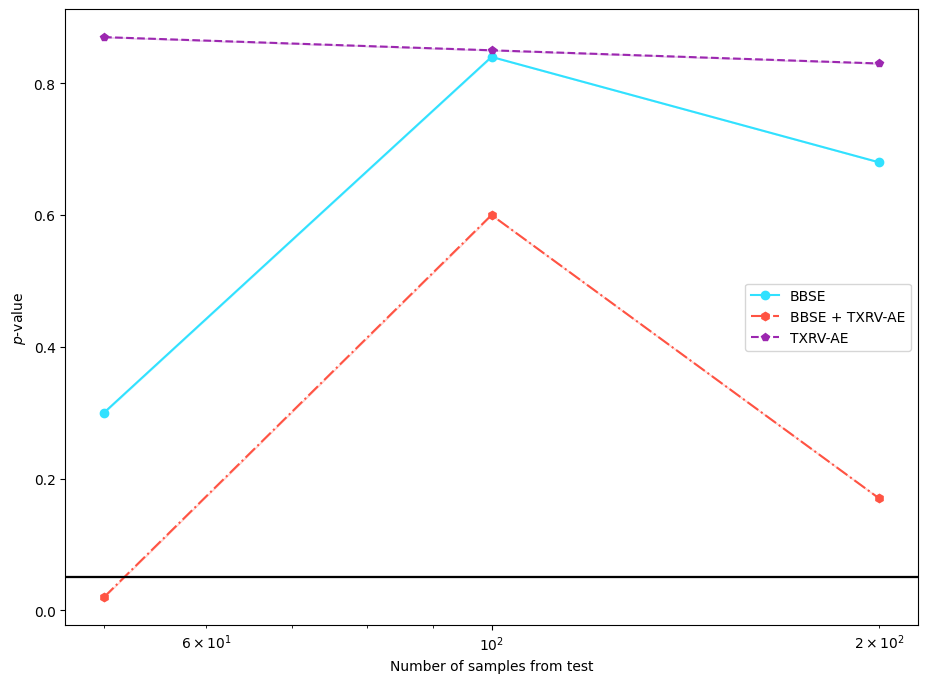

In [3]:
model = DenseNet(weights="densenet121-res224-all")
dr_methods = {
    "BBSE": "bbse-soft",
    "BBSE + TXRV-AE": "bbse-soft+txrv-ae",
    "TXRV-AE": "txrv-ae",
}
results = {}

for name, dr_method in dr_methods.items():
    if name == "TXRV-AE":
        reductor = Reductor(dr_method=dr_method, device=device)
    else:
        reductor = Reductor(dr_method=dr_method, model=model, device=device)
    detector = Detector(
        "sensitivity_test",
        reductor=reductor,
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    result = detector.detect_shift(source_ds, target_ds)
    results[name] = result
plot_drift_experiment(results)

## Example 3. Sensitivity test experiment with models trained on different datasets

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.97 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.23 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.74 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.03 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.58 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.39 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.08 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.71 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.70 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:04, 16.17 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 28.63 examples/s]

Map:  96%|█████████▌| 96/100 [00:03<00:00, 36.78 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.59 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.34 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.69 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.15 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.78 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.41 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.71 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.26 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.79 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.46 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.19 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 51.01 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 54.62 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 54.24 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.38 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.97 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.03 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.35 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 38.57 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.66 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.10 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.04 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.13 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.65 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 51.79 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.49 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.97 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.14 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.56 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.33 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 51.50 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 53.59 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 53.31 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.46 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.12 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:04, 16.72 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 27.73 examples/s]

Map:  96%|█████████▌| 96/100 [00:03<00:00, 35.71 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.55 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.15 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.77 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.21 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.21 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.15 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.73 examples/s]

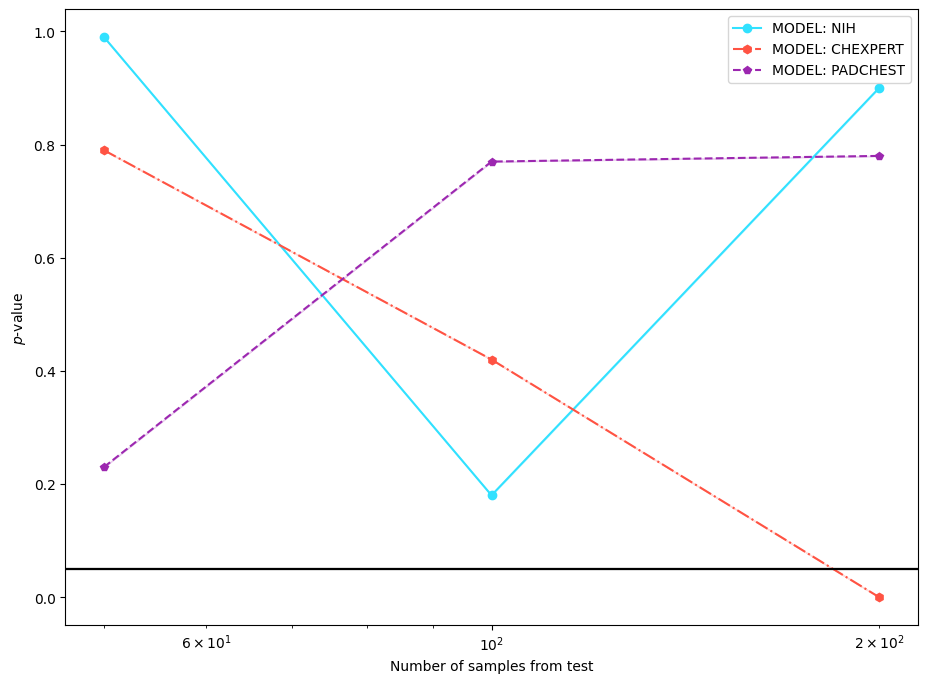

In [4]:
models = {
    "MODEL: NIH": "densenet121-res224-nih",
    "MODEL: CHEXPERT": "densenet121-res224-chex",
    "MODEL: PADCHEST": "densenet121-res224-pc",
}
results = {}

for model_name, model in models.items():
    detector = Detector(
        "sensitivity_test",
        reductor=Reductor(
            dr_method="bbse-soft", model=DenseNet(weights=model), device=device
        ),
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    results[model_name] = detector.detect_shift(source_ds, target_ds)
plot_drift_experiment(results)

## Example 4. Sensitivity test experiment with different clinical shifts

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 52019.14 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 71603.84 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 82488.66 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 87876.03 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 95336.28 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 98315.00 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 52104.45 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 72741.92 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 82419.14 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 90747.42 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 92736.45 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 96381.23 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.08 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.47 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.80 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 47.40 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 52.07 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 55.07 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 53.99 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.59 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.63 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.60 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.06 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.03 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.57 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.08 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 37.34 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 43.57 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 49.04 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.26 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.86 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  10%|▉         | 11000/112120 [00:00<00:03, 28448.13 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 82362.01 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 85510.12 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 89185.48 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 91868.49 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 93131.02 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:02, 42507.21 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 61068.25 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 74926.64 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:01<00:00, 85597.45 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 93300.58 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 90828.96 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.53 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.39 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.55 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.58 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 51.95 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 54.53 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 54.12 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.70 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.79 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.34 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 29.93 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 38.95 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:02<00:10, 15.95 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 28.48 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:02, 37.64 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 44.14 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 49.34 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.65 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.15 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 54380.63 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 75109.61 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 85821.66 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 92277.58 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 96089.45 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 97664.41 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 50078.79 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 72835.77 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 83730.39 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 90795.67 examples/s]

Filter (num_proc=6):  76%|███████▋  | 85748/112120 [00:01<00:00, 76162.55 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 104452.68 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.64 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.77 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.56 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 47.62 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 52.83 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 55.72 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 54.72 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.50 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.90 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.66 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.20 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.63 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:10, 16.26 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 27.73 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:02, 36.75 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 43.34 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 48.77 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.00 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.00 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 51542.76 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 72250.14 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 83289.62 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 89861.22 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 94267.07 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 93131.30 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 47494.31 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 72290.81 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 82741.56 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 87792.76 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 90890.26 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 95377.33 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:02<00:10, 15.39 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 27.90 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:02, 37.44 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 44.88 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 50.15 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 53.94 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 53.64 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.84 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.84 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.41 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 29.83 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 38.88 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:10, 16.19 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 28.54 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:02, 37.19 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 43.80 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 49.30 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.72 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.25 examples/s]

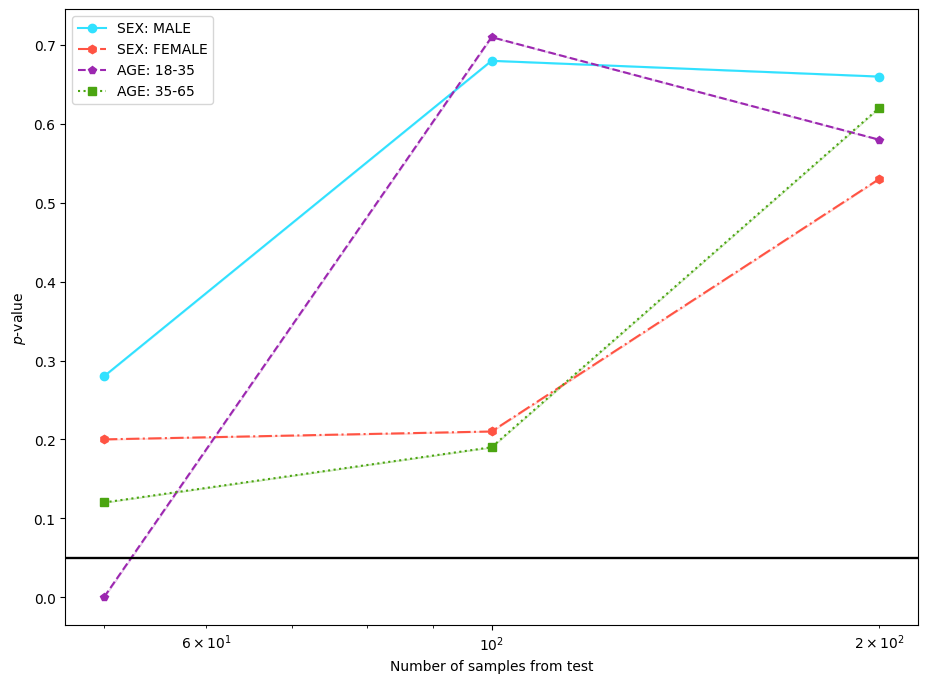

In [5]:
model = DenseNet(weights="densenet121-res224-all")
source_slice = None
target_slices = {
    "SEX: MALE": SliceSpec(spec_list=[{"Patient Gender": {"value": "M"}}]),
    "SEX: FEMALE": SliceSpec(spec_list=[{"Patient Gender": {"value": "F"}}]),
    "AGE: 18-35": SliceSpec(
        spec_list=[{"Patient Age": {"min_value": 18, "max_value": 35}}]
    ),
    "AGE: 35-65": SliceSpec(
        spec_list=[{"Patient Age": {"min_value": 35, "max_value": 65}}]
    ),
}
results = {}

for name, target_slice in target_slices.items():
    source_slice = None
    shifter = ClinicalShiftApplicator(
        "custom", source=source_slice, target=target_slice
    )
    ds_source, ds_target = shifter.apply_shift(nih_ds, num_proc=6)

    ds_source = ds_source.with_transform(
        partial(apply_transforms, transforms=transforms),
        columns=["features"],
        output_all_columns=True,
    )
    ds_target = ds_target.with_transform(
        partial(apply_transforms, transforms=transforms),
        columns=["features"],
        output_all_columns=True,
    )

    detector = Detector(
        "sensitivity_test",
        reductor=Reductor(dr_method="bbse-soft", model=model, device=device),
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    results[name] = detector.detect_shift(ds_source, ds_target)
plot_drift_experiment(results)

## Example 5. Rolling window experiment with synthetic timestamps using biweekly window

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.79 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.79 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.74 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.60 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.88 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 53.41 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 53.44 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.36 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.21 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.76 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.71 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.33 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.86 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.61 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.38 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.13 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.56 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.55 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.08 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.33 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.94 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.42 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.92 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.30 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.88 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.67 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.48 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.82 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.86 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.63 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.51 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.70 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.36 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.25 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.28 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.73 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.88 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:02<00:01, 15.51 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.17 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.75 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.48 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:02<00:01, 15.87 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.34 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.44 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.43 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.82 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.99 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.10 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.30 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.93 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.27 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.24 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.10 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.90 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.01 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.50 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.14 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.66 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.77 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.13 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.15 examples/s]

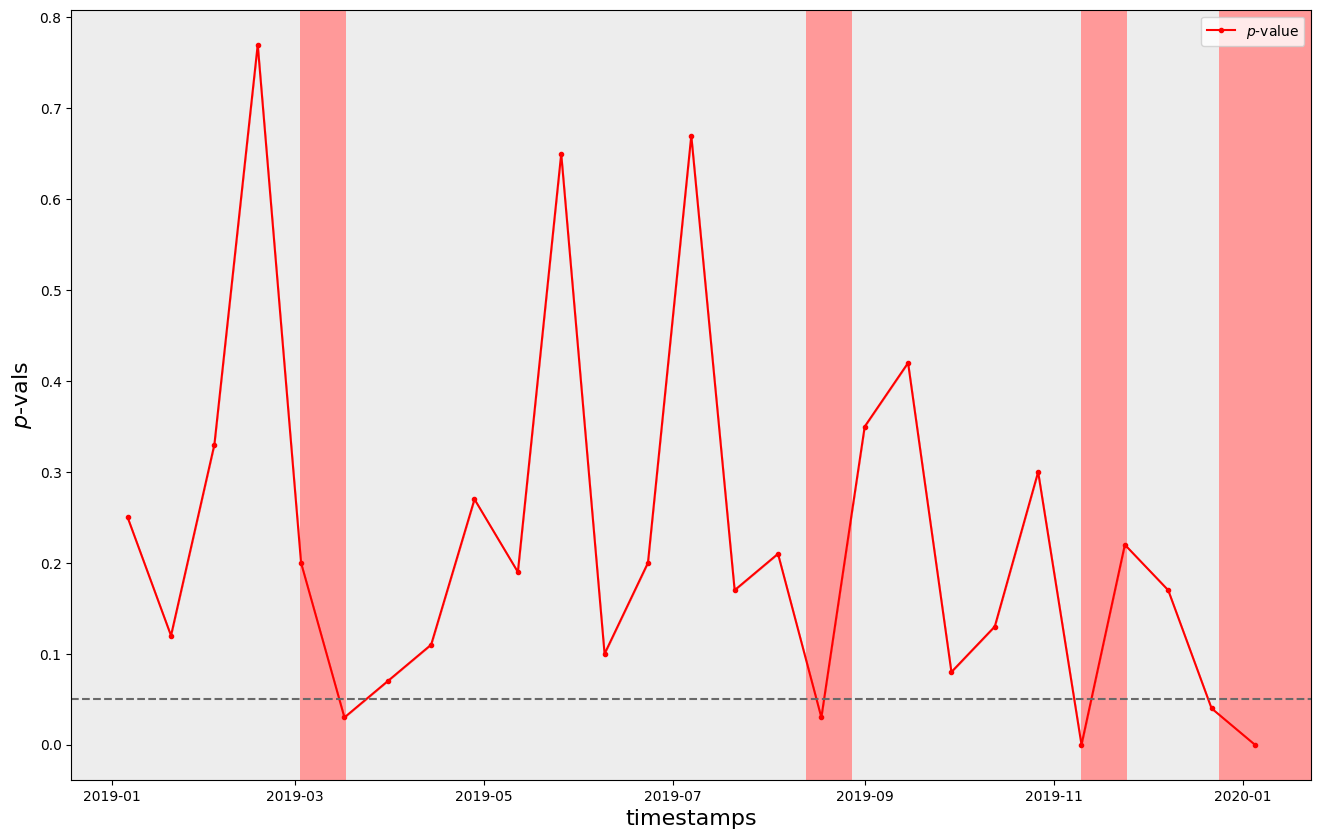

In [6]:
model = DenseNet(weights="densenet121-res224-all")
detector = Detector(
    "rolling_window_drift",
    reductor=Reductor(dr_method="bbse-soft", model=model, device=device),
    tester=TSTester(tester_method="mmd"),
    source_sample_size=200,
    target_sample_size=50,
    timestamp_column="timestamp",
    window_size="2W",
)

results = detector.detect_shift(source_ds, target_ds)
plot_drift_timeseries(results)